## 2-) Results 
Use of our optionpricer in our main program.

Type the date from when you need to better Visualize the volatility regime of underlined asset prices (yyyy-mm-dd):  2018-01-01


[*********************100%%**********************]  1 of 1 completed


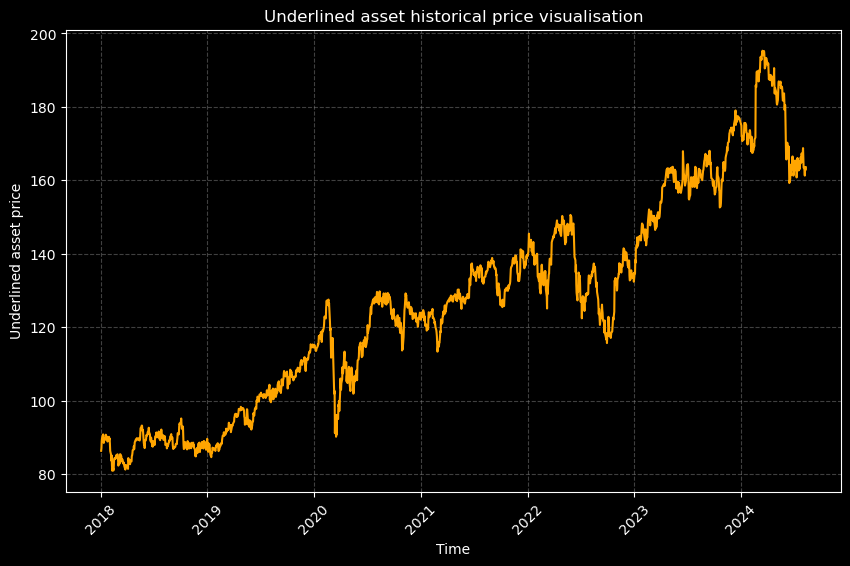

Now, from which date would you like to calculate the historical volatility? (yyyy-mm-dd) 2024-01-01


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


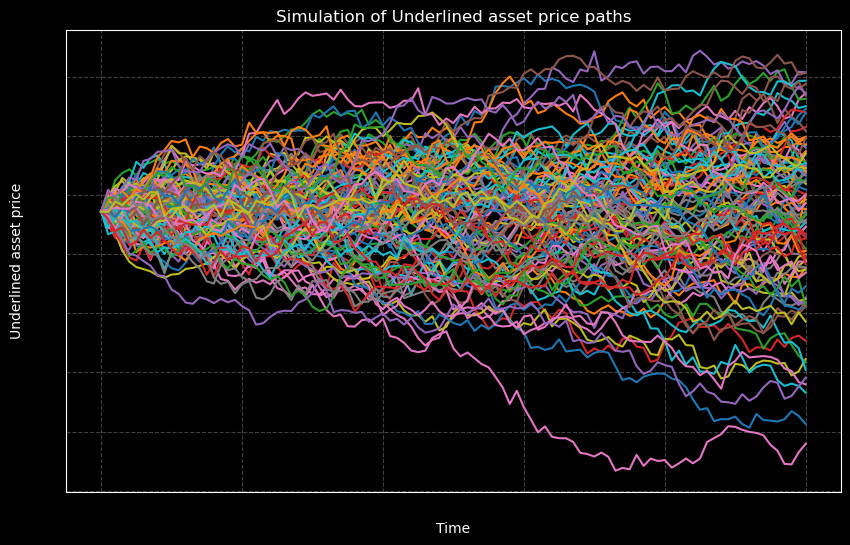

call Option Price by BS: 8.23252373922648
call Option Price by MC: 7.723003804077988


In [1]:
import asyncio
import time
from abc import ABC, abstractmethod
import optionpricer as mp # import of our module
async def main():
    # Underlined assets initialisation
    stock = mp.Stock()
    # Date recovery to Visualize the volatility regime of underlined asset prices
    start_date_volatility_visual = input("Type the date from when you need to better Visualize the volatility regime of underlined asset prices (yyyy-mm-dd): ")
    stock.plot_histo_underlined_asset_price('AI.PA',start_date_volatility_visual)
    
    # Models initialisation
    black_scholes = mp.BlackScholesPrice()
    monte_carlo = mp.MonteCarloPrice()

    # option initialisation
    option_bs = mp.VanillaOption(stock, black_scholes, 156, 'call', 0.025, '2025-08-16', 'European', '2025-08-01')
    option_mc = mp.VanillaOption(stock, monte_carlo, 156, 'call', 0.025, '2025-08-16', 'European', '2025-08-01')

    # Date recovery for historical volatility calculation
    start_date = input("Now, from which date would you like to calculate the historical volatility? (yyyy-mm-dd)")

    # Data loading
    await option_bs.load_data('AI.PA', start_date)
    option_bs.calculate_premium()
    await option_mc.load_data('AI.PA', start_date)
    
    #start = time.perf_counter()
    option_mc.calculate_premium()
    #end = time.perf_counter()
    #print("Elapsed time:", end - start)
    print("**************AIR LIQUIDE CALL OPTION PRICING**************"
    print(f'{option_bs.option_type} Option Price by BS: {option_bs.premium}')
    print(f'{option_mc.option_type} Option Price by MC: {option_mc.premium}')

await main()